In [2]:
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

# Generate some sample data
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Outlier removal using Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20)
outlier_labels_lof = lof.fit_predict(X)
X_clean_lof = X[outlier_labels_lof != -1]

# Outlier removal using Isolation Forest
iforest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels_iforest = iforest.fit_predict(X)
X_clean_iforest = X[outlier_labels_iforest != -1]

# Outlier removal using Elliptic Envelope
ee = EllipticEnvelope(contamination=0.05)
outlier_labels_ee = ee.fit_predict(X)
X_clean_ee = X[outlier_labels_ee != -1]

# Outlier removal using One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
outlier_labels_ocsvm = ocsvm.fit_predict(X)
X_clean_ocsvm = X[outlier_labels_ocsvm != -1]

print("Local Outlier Factor (LOF):")
print(f"Original data shape: {X.shape}, Cleaned data shape: {X_clean_lof.shape}")

print("Isolation Forest:")
print(f"Original data shape: {X.shape}, Cleaned data shape: {X_clean_iforest.shape}")

print("Elliptic Envelope:")
print(f"Original data shape: {X.shape}, Cleaned data shape: {X_clean_ee.shape}")

print("One-Class SVM:")
print(f"Original data shape: {X.shape}, Cleaned data shape: {X_clean_ocsvm.shape}")


Local Outlier Factor (LOF):
Original data shape: (1000, 2), Cleaned data shape: (967, 2)
Isolation Forest:
Original data shape: (1000, 2), Cleaned data shape: (950, 2)
Elliptic Envelope:
Original data shape: (1000, 2), Cleaned data shape: (950, 2)
One-Class SVM:
Original data shape: (1000, 2), Cleaned data shape: (950, 2)


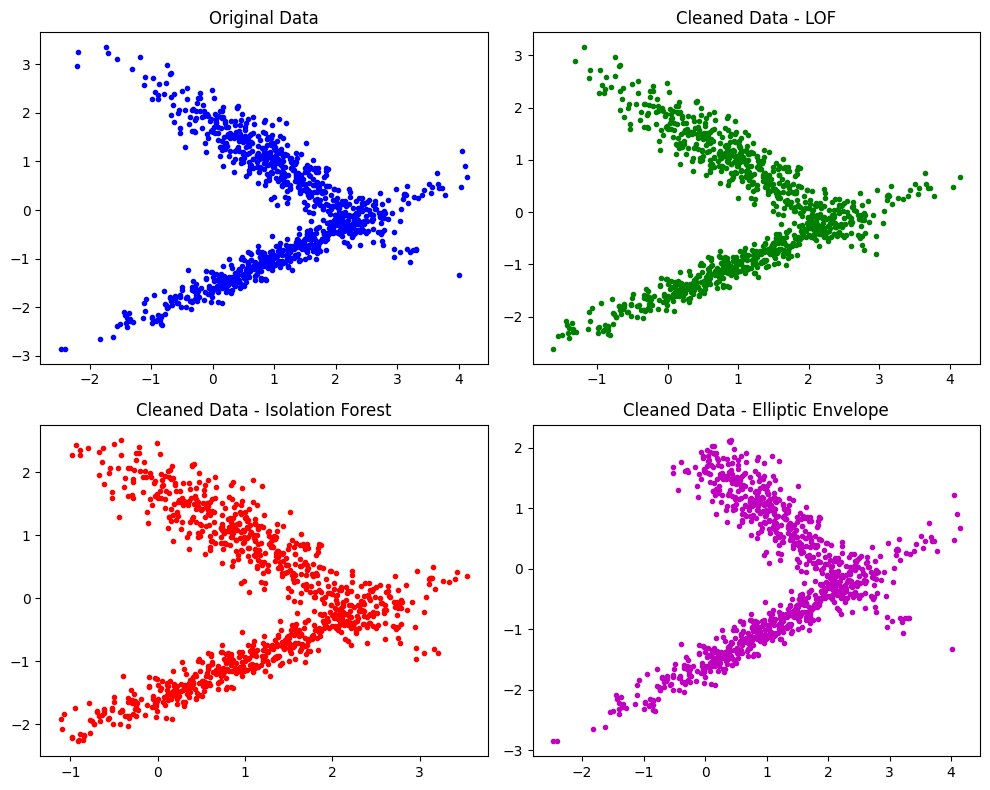

In [3]:
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b', marker='.', label='Original Data')
plt.title('Original Data')

# Plot cleaned data using LOF
plt.subplot(2, 2, 2)
plt.scatter(X_clean_lof[:, 0], X_clean_lof[:, 1], c='g', marker='.', label='Cleaned Data (LOF)')
plt.title('Cleaned Data - LOF')

# Plot cleaned data using Isolation Forest
plt.subplot(2, 2, 3)
plt.scatter(X_clean_iforest[:, 0], X_clean_iforest[:, 1], c='r', marker='.', label='Cleaned Data (Isolation Forest)')
plt.title('Cleaned Data - Isolation Forest')

# Plot cleaned data using Elliptic Envelope
plt.subplot(2, 2, 4)
plt.scatter(X_clean_ee[:, 0], X_clean_ee[:, 1], c='m', marker='.', label='Cleaned Data (Elliptic Envelope)')
plt.title('Cleaned Data - Elliptic Envelope')

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

In [16]:
data=pd.read_csv("water_potability.csv",usecols=["Sulfate"])
tdata=pd.read_csv("titanic.csv",usecols=["Fare"])

In [18]:
print(data)
print(tdata)

         Sulfate
0     368.516441
1            NaN
2            NaN
3     356.886136
4     310.135738
...          ...
3271  359.948574
3272         NaN
3273         NaN
3274         NaN
3275         NaN

[3276 rows x 1 columns]
        Fare
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
..       ...
886  13.0000
887  30.0000
888  23.4500
889  30.0000
890   7.7500

[891 rows x 1 columns]


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_9524\1915045088.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tdata["Fare"],palette="Dark2")


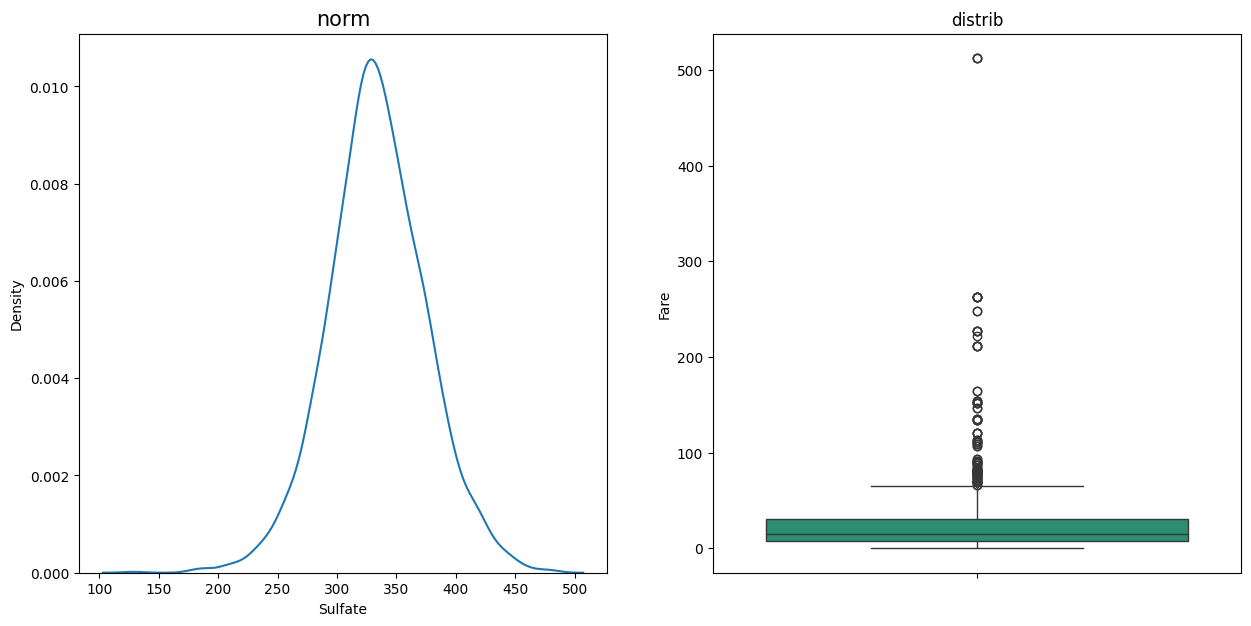

In [24]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("norm",fontsize=15)
sns.kdeplot(data=data["Sulfate"])
plt.subplot(1,2,2)
plt.title("distrib")
sns.boxplot(data=tdata["Fare"],palette="Dark2")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9524\2051592308.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tdata, palette="Dark2", color='b', legend=False)  # Adjusted palette parameter


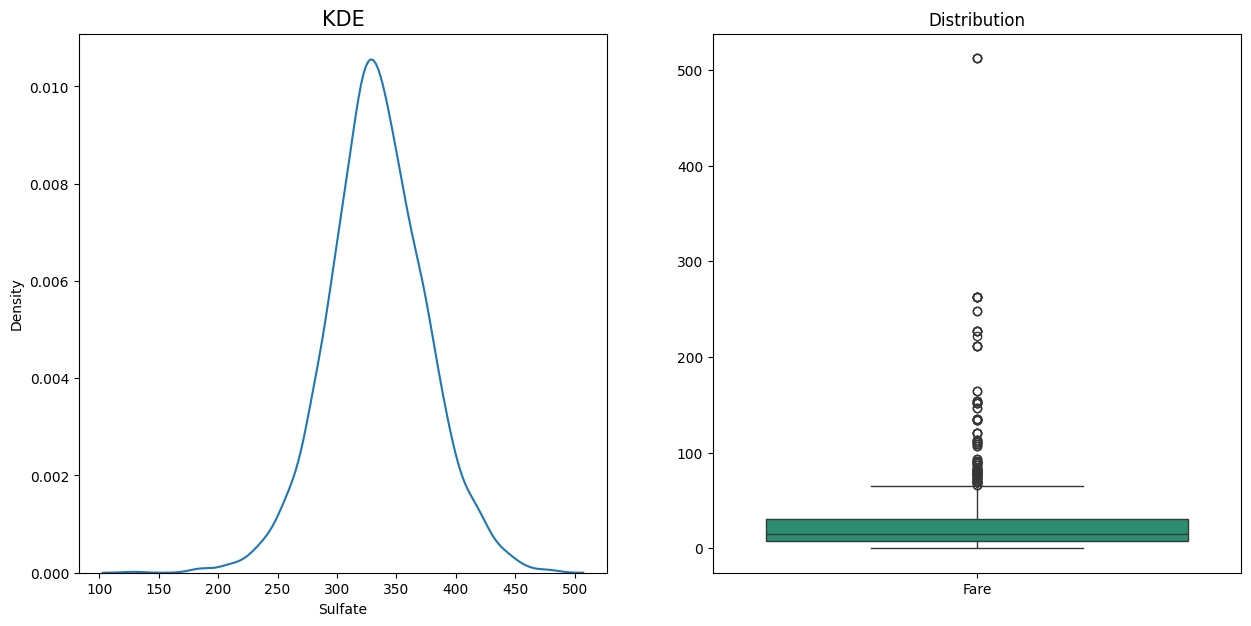

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

# Plot KDE
plt.subplot(1, 2, 1)
plt.title("KDE", fontsize=15)
sns.kdeplot(data=data["Sulfate"])

# Plot boxplot
plt.subplot(1, 2, 2)
plt.title("Distribution")
sns.boxplot(data=tdata, palette="Dark2", color='b', legend=False)  # Adjusted palette parameter

plt.show()


In [28]:
#defining lower and upper limit
up_lim = data["Sulfate"].mean() + 3 * data["Sulfate"].std()
low_lim = data["Sulfate"].mean() - 3 * data["Sulfate"].std()

In [29]:
print(up_lim)
print(low_lim)

458.02629799583167
209.5252552257954


In [32]:
data_new=data[(data['Sulfate']>low_lim)&(data['Sulfate']<up_lim)]

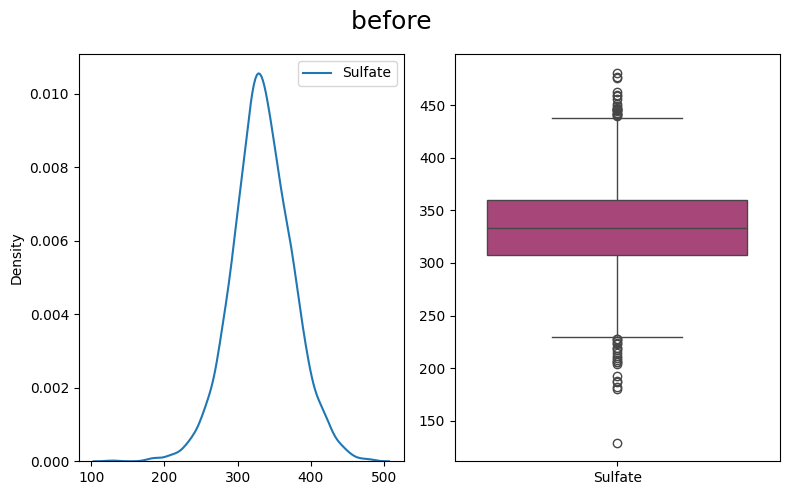

In [33]:
plt.figure(figsize=(8,5))
plt.suptitle("before ", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = data)
plt.subplot(1,2,2)
sns.boxplot(data = data, palette="magma")
plt.tight_layout()
plt.show()

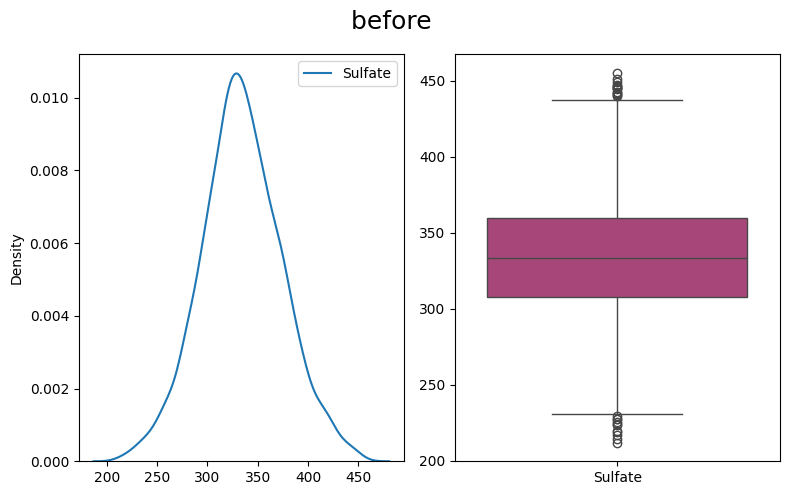

In [34]:
plt.figure(figsize=(8,5))
plt.suptitle("after ", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = data_new)
plt.subplot(1,2,2)
sns.boxplot(data = data_new, palette="magma")
plt.tight_layout()
plt.show()

In [37]:
#tdata

q1 = tdata["Fare"].quantile(0.25)
q3 = tdata["Fare"].quantile(0.75)

In [38]:
rang=q3-q1

In [41]:
max_lim=q3+(1.5*rang)
min_lim=q1-(1.5*rang)

In [43]:
#capping
import numpy as np
tdata_new = pd.DataFrame(np.where(tdata["Fare"] > max_lim, max_lim, 
         (np.where(tdata["Fare"] < min_lim, min_lim, tdata["Fare"]))), columns=["Fare"])

capping focuses on setting limits to exclude extreme values, while trimming involves removing a portion of the data based on statistical criteria.

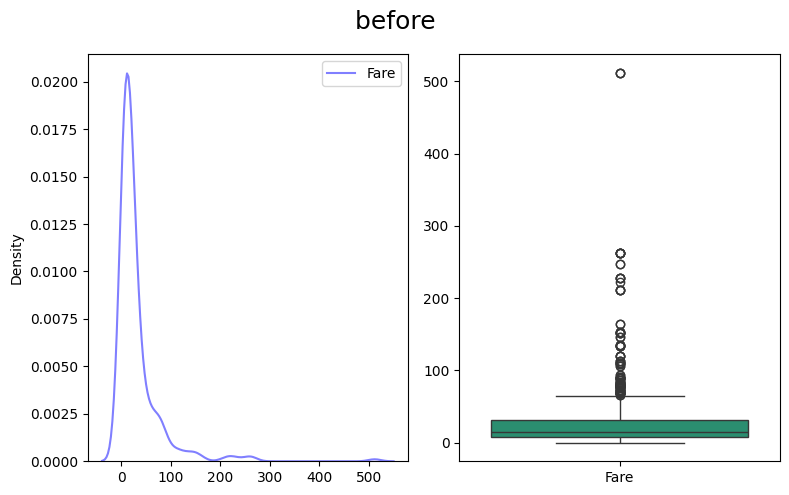

In [44]:
plt.figure(figsize=(8,5))
plt.suptitle(" before ", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = tdata, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = tdata, palette="Dark2")
plt.tight_layout()
plt.show()


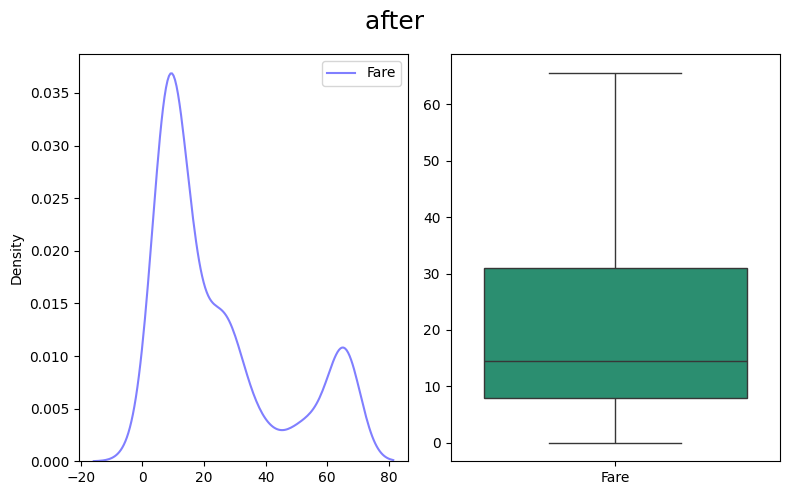

In [45]:
plt.figure(figsize=(8,5))
plt.suptitle(" after ", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = tdata_new, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = tdata_new, palette="Dark2")
plt.tight_layout()
plt.show()


You're correct in observing that both methods you've used, although effective, might not strictly adhere to the definitions of trimming and capping, especially if we consider the statistical data used to set the limits.

Let's clarify the concepts again:

Trimming:

Trimming involves removing a certain percentage or number of data points from either end of the distribution, typically based on statistical criteria such as percentiles or standard deviations. It's often done to address the influence of outliers on statistical measures.
While your method does involve using statistical measures (mean and standard deviation) to set the upper and lower limits, it's more akin to capping as it sets limits rather than trimming a percentage of data points.
Capping:

Capping involves setting upper or lower limits on the data to exclude extreme values that fall outside the specified range. This is typically done to address outliers or to ensure that the data falls within a certain range deemed appropriate for analysis.
Your method of setting upper and lower limits based on statistical measures aligns more closely with the definition of capping than trimming.
Your approach is essentially a combination of both methods, where you're using statistical measures to set limits on the data. This can be effective in handling outliers and ensuring that the data falls within a reasonable range for analysis. While it may not strictly adhere to the traditional definitions of trimming and capping, it serves the purpose of data preprocessing effectively.

If you want to strictly adhere to the definitions, you might consider directly removing a certain percentage of data points from the upper and lower tails of the distribution for trimming, and setting fixed upper and lower limits for capping, regardless of statistical measures. However, both approaches have their merits depending on the context and the specific requirements of your analysis